# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

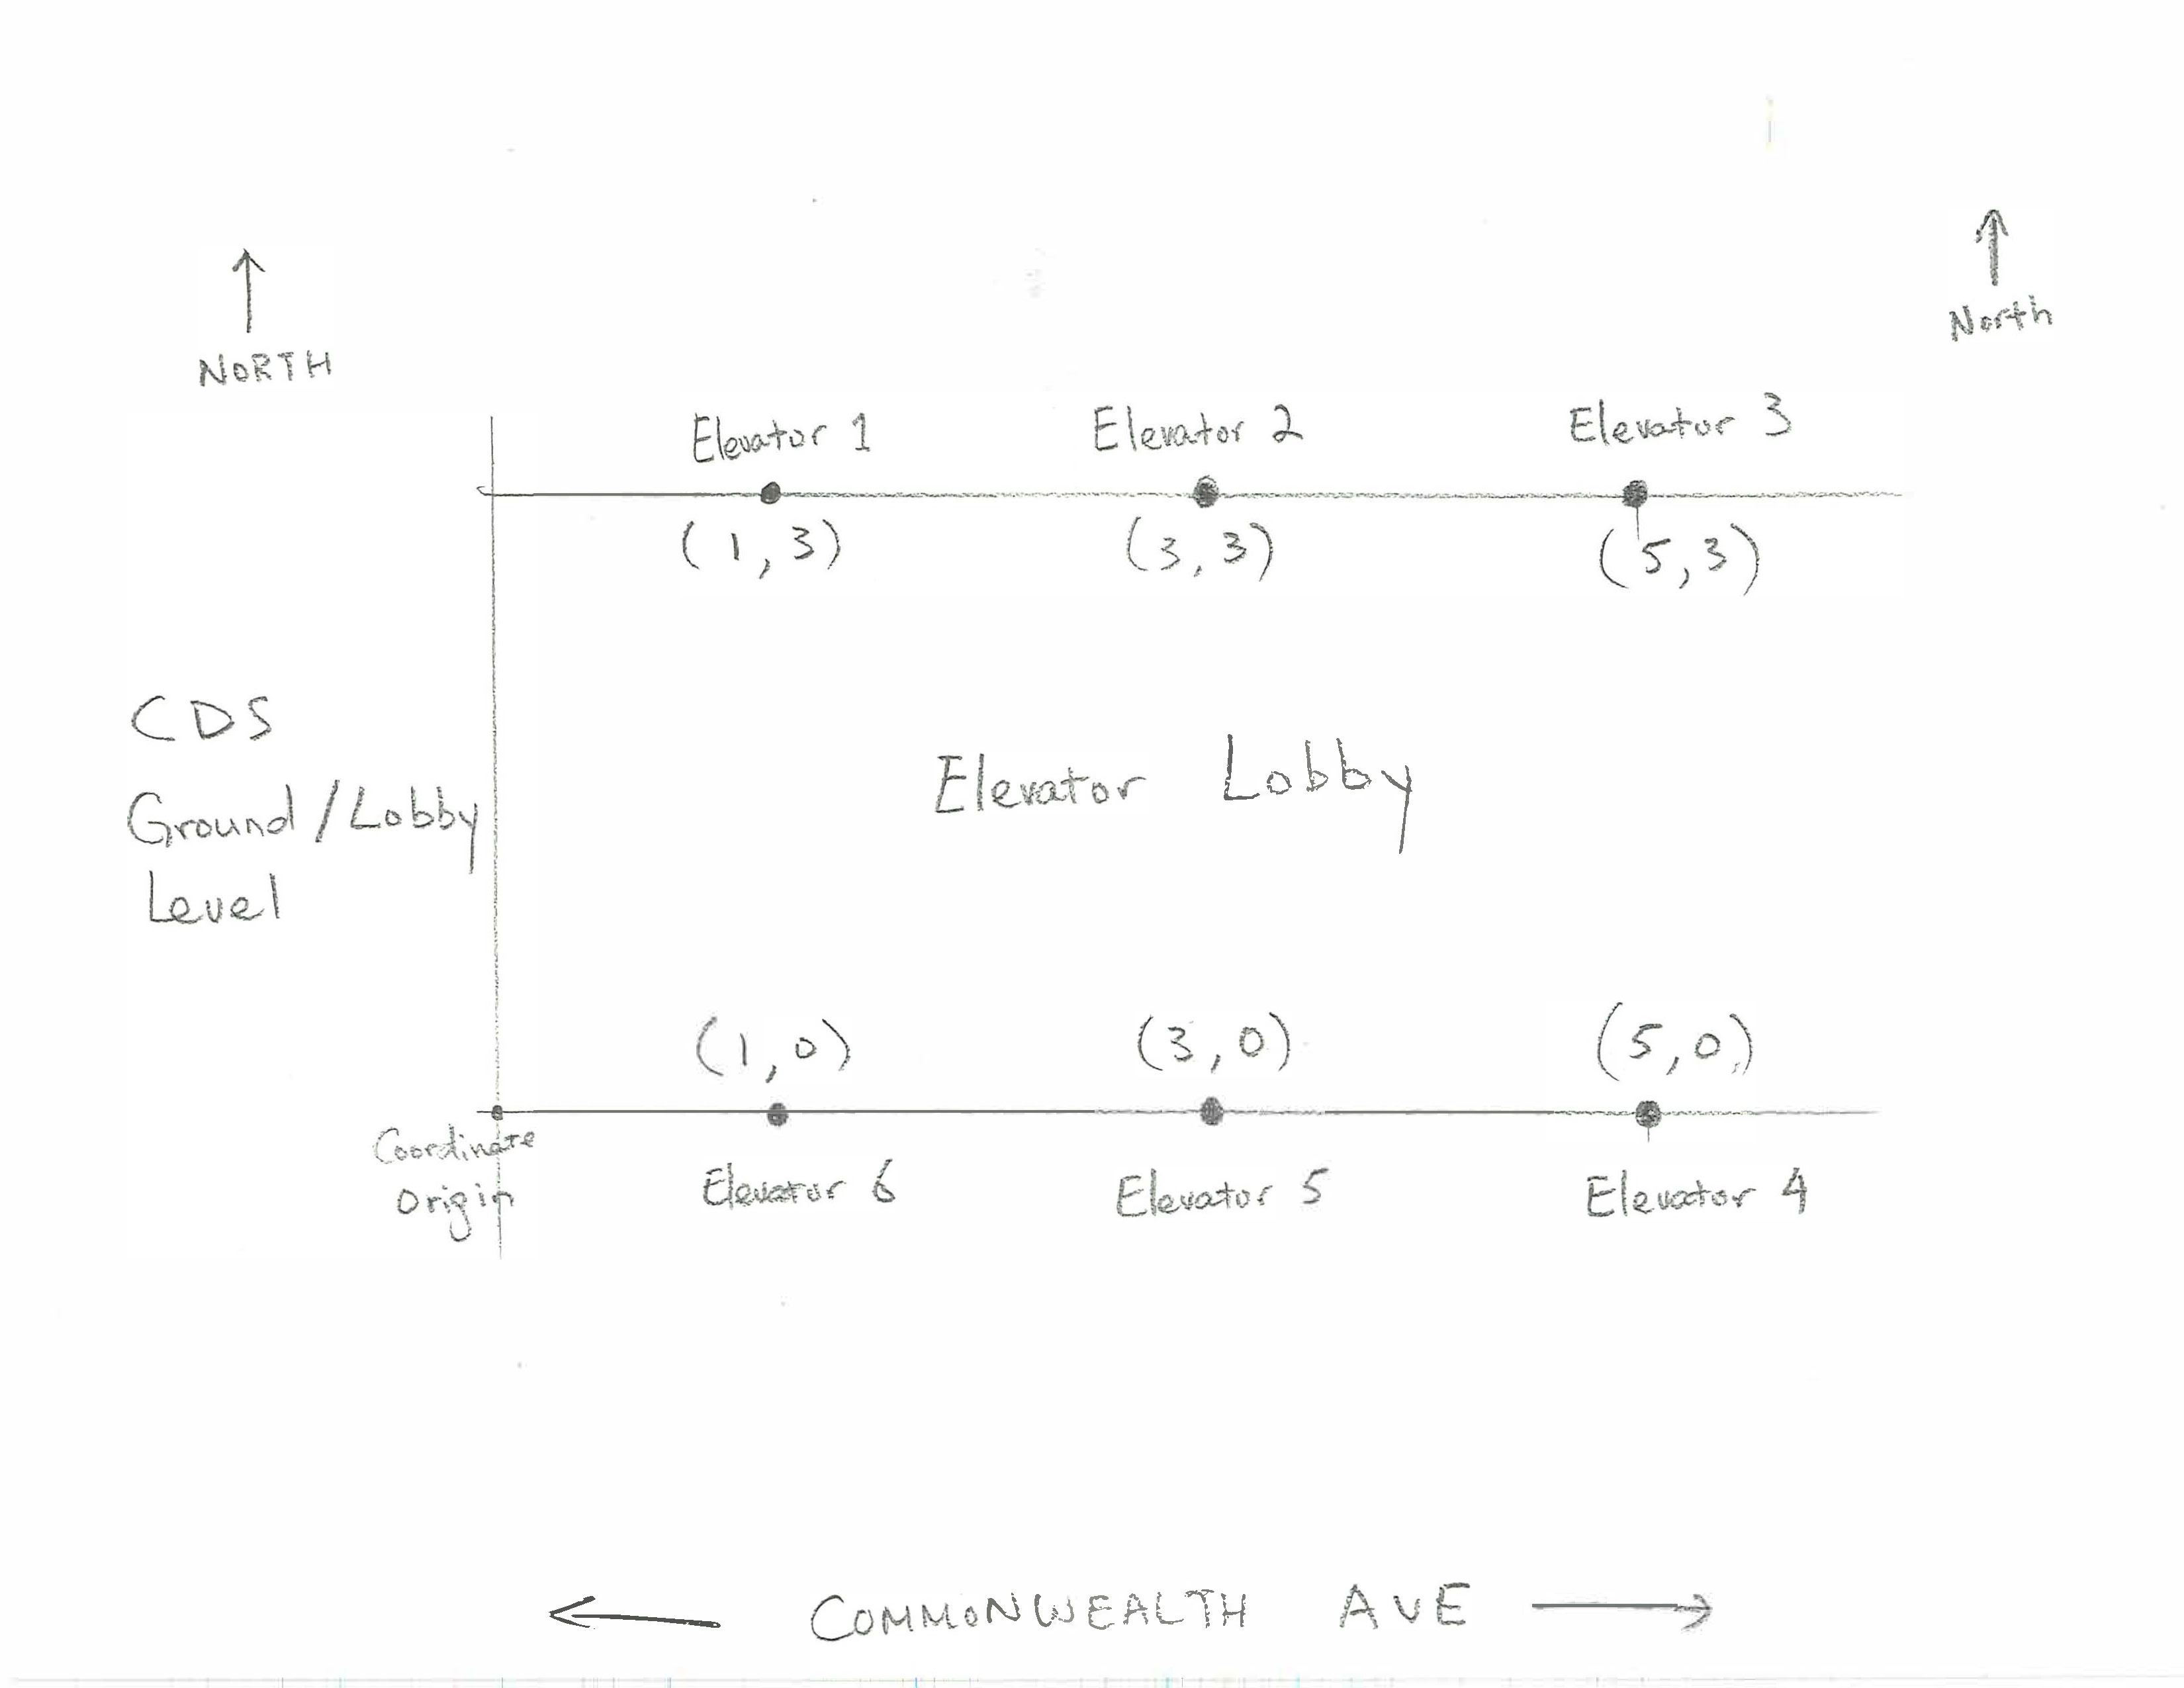

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** The coordinates were calculated based on the usage frequency of each coordinate x and y. I used the coordinates of each elevator and multiplied them by their respective usage counts, then divided by the total usage to get the average position. I got the optimal waiting coordinate at (3.0489, 1.4893). This coordinate would minimize expected walking distance.

In [17]:
# Code for question 1:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Load the data
data = pd.read_csv('elevator.csv')

# Row 0 to 982 row for the 'Elevator ID' column
subset_data = data.loc[0:981, 'Elevator ID']

elevator_list = subset_data.tolist()

elevator1 = 0
elevator2 = 0
elevator3 = 0
elevator4 = 0
elevator5 = 0
elevator6 = 0

elevatorsum = 0
average_x = 0
average_y = 0




for elevator in elevator_list:
  if elevator == 1:
    elevator1 += 1
  elif elevator == 2:
    elevator2 += 1
  elif elevator == 3:
    elevator3 += 1
  elif elevator == 4:
    elevator4 += 1
  elif elevator == 5:
    elevator5 += 1
  else:
    elevator6 += 1

elevatorsum = elevator1 + elevator2 + elevator3 + elevator4 + elevator5 + elevator6

average_x = (1 * elevator1 + 3 * elevator2 + 5 * elevator3 + 5 * elevator4 + 3 * elevator5 + 1 * elevator6) / (elevatorsum)

average_y = (3 * elevator1 + 3 * elevator2 + 3 * elevator3 + 0 * elevator4 + 0 * elevator5 + 0 * elevator6) / (elevatorsum)
print (elevator1)
print(elevator2)
print(elevator3)
print(elevator4)
print(elevator5)
print(elevator6)

print ("optimal coordinate to stand at: ", average_x, " ", average_y)


155
162
170
168
167
159
optimal coordinate to stand at:  3.0489296636085625   1.489296636085627


**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

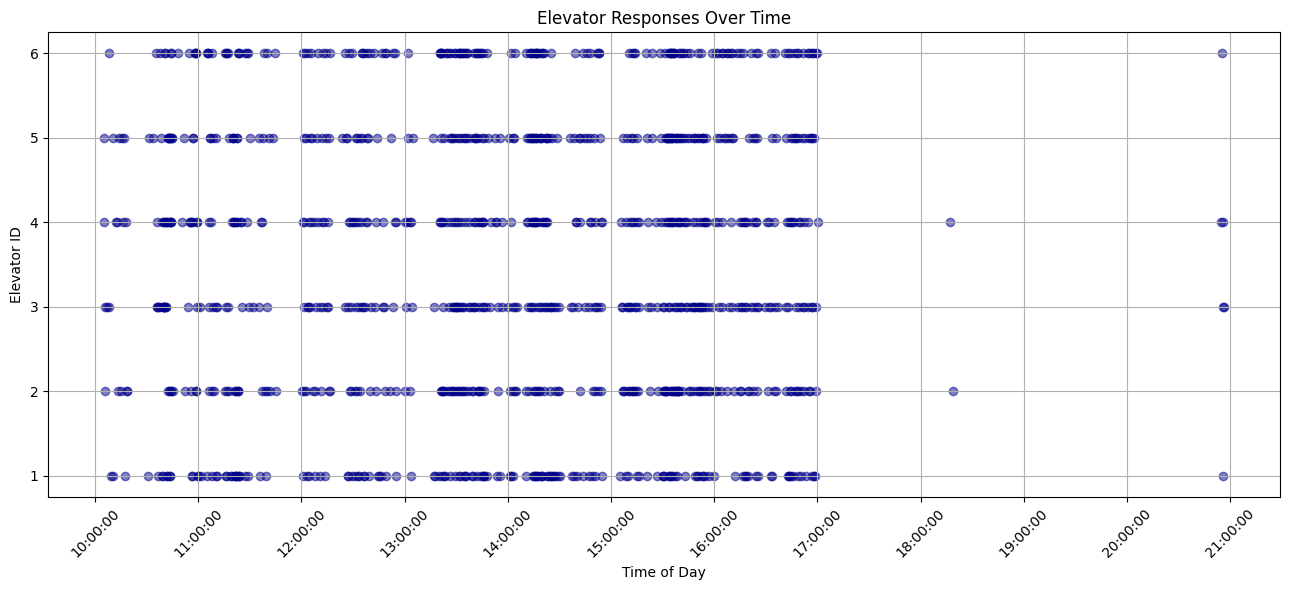

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def make_plot():

    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    # Extract time only
    data['TimeOnly'] = data['Timestamp'].dt.time

    # Select training data
    subset_data = data.loc[0:981, ['TimeOnly', 'Elevator ID']]

    plt.figure(figsize=(13, 6))

    # Scatter plot with time of day on the x-axis
    plt.scatter(pd.to_datetime(subset_data['TimeOnly'], format='%H:%M:%S'), subset_data['Elevator ID'], color='#00008B', alpha=0.5)
    plt.title('Elevator Responses Over Time')
    plt.xlabel('Time of Day')
    plt.ylabel('Elevator ID')

    # Format the x-axis to show times
    time_fmt = mdates.DateFormatter('%H:%M:%S')
    plt.gca().xaxis.set_major_formatter(time_fmt)


    plt.xticks(rotation=45)

    plt.grid(True)

    plt.tight_layout()
    plt.show()

make_plot()




*   Elevator 1 is the least used, as it is the most sparse
*   Elevator 3 is most frequently used from 1:30pm to 5pm.
*   Busy hours for all elevators start at 1:30pm and stop at 5pm
*   Elevators 1, 3, 4, and 6 function late into the evening, while Elevator 2 stops around 6pm and Elevator 5 stops at 5pm.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [19]:

data = data.loc[0:981]


# Initialize a dictionary
elevator_stats = {}


for elevator_id, group in data.groupby('Elevator ID'):

    total_arrivals = len(group)


    group = group.sort_values('Timestamp')


    start_time = group['Timestamp'].min()
    end_time = group['Timestamp'].max()


    operational_time = (end_time - start_time).total_seconds()


    elevator_stats[elevator_id] = {
        'Total Arrivals': total_arrivals,
        'Total Operational Time (seconds)': operational_time,
        'Average Frequency (arrivals/second)': total_arrivals / operational_time if operational_time > 0 else 0
    }


elevator_freq_df = pd.DataFrame.from_dict(elevator_stats, orient='index')


print(elevator_freq_df)

   Total Arrivals  Total Operational Time (seconds)  \
1             155                          110480.0   
2             162                          110456.0   
3             170                          111206.0   
4             168                          111294.0   
5             167                          110569.0   
6             159                          108698.0   

   Average Frequency (arrivals/second)  
1                             0.001403  
2                             0.001467  
3                             0.001529  
4                             0.001510  
5                             0.001510  
6                             0.001463  


**Answer:** It is not optimal to wait in the location in question 1 because we did not take into account the arrivals/second. This could possibly change the best coordinate as we turn to a more strategic approach in figuring out the probability for whether the next elevator to arrive is which elevator.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 110480 | 110456 | 111206 | 111294 | 110569 |108698 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 |159 |
| Average frequency (arrivals per second) | 0.001403 | 0.001467 | 0.001529 | 0.001510 | 0.001510 |0.001463 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

**Answer:**
For each elevator, I take the average frequency (arrivals per second) for a particular elevator and divide it over the sum of average frequencies. As we find the probability of each elevator being the next one to arrive, we get a more well rounded view with the probabilistic approach.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.1679 | 0.1756 | 0.1830 | 0.1807 | 0.1178 |0.1751 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer:**
x_coord = (1 * 0.1679)+(3 * 0.1756)+(5 * 0.183)+(5 * 0.1807)+(3 * 0.1178)+(1 * 0.1751) = 3.0417

y_coord = (3 * 0.1679)+(3 * 0.1756)+(3 * 0.183)+(0 * 0.1807)+(0 * 0.1178)+(0 * 0.1751) = 1.5795

The best location to wait is at (3.0417, 1.5795). I calculated the weighted average of the coordinates of each elevator using their probabilties from the previous table.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [20]:


elevator_coords = {
    'Elevator 1': (1, 3),
    'Elevator 2': (3, 3),
    'Elevator 3': (5, 3),
    'Elevator 4': (5, 0),
    'Elevator 5': (3, 0),
    'Elevator 6': (1, 0),
}

# Probabilities of next arrival
elevator_probabilities = {
    'Elevator 1': 0.1679,
    'Elevator 2': 0.1756,
    'Elevator 3': 0.1830,
    'Elevator 4': 0.1807,
    'Elevator 5': 0.1178,
    'Elevator 6': 0.1751
}

def get_average_walk_distance(coordinate):
    distances = []


    for elevator, (x_elev, y_elev) in elevator_coords.items():
        distance = np.sqrt((coordinate[0] - x_elev)**2 + (coordinate[1] - y_elev)**2)
        weighted_distance = distance * elevator_probabilities[elevator]
        distances.append(weighted_distance)

    return np.sum(distances)

average_distance_response_1_weighted = get_average_walk_distance((3.0469, 1.4893))
average_distance_response_2_weighted = get_average_walk_distance((3.0417, 1.5795))


print(f'Weighted average distance from first response of coordinates : {average_distance_response_1_weighted}')
print(f'Weighted average distance from second response of coordinates : {average_distance_response_2_weighted}')



Weighted average distance from first response of coordinates : 2.2069983707101395
Weighted average distance from second response of coordinates : 2.202624426391803


**Answer:** This function uses the distance formula to find the distance from a given coordinate to each elevator, weighing each distance by the elevator's arrival probability. I then computed the weighted average walking distance for the coordinates from question 1 and question 5. The result is that the new coordinates required shorter walking distance ( 2.2026 vs 2.2070 )

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.2069 |   2.1635 |
|Smart position (Question 5) | 2.2026 |   2.1631 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:**

The second set of coordinates is closer to the elevators, evident from the lower value (2.1635 vs 2.1631). I believe that the reason for this shortened distance because I took into account the actual usage frequency of each elevator, which gives a more practical strategy compared to the first response where the "next elevator to arrive" probability is not taken into account.

In [23]:


# Load new data
data2 = pd.read_csv('elevator2.csv')


# Convert Timestamp to datetime
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])

# Initialize a dictionary to hold totals for each elevator
elevator_stats = {}


for elevator_id, group in data2.groupby('Elevator ID'):

    total_arrivals = len(group)


    group = group.sort_values('Timestamp')


    start_time = group['Timestamp'].min()
    end_time = group['Timestamp'].max()


    operational_time = (end_time - start_time).total_seconds()


    elevator_stats[elevator_id] = {
        'Total Arrivals': total_arrivals,
        'Total Operational Time (seconds)': operational_time,
        'Average Frequency (arrivals/second)': total_arrivals / operational_time if operational_time > 0 else 0
    }


elevator_freq_df = pd.DataFrame.from_dict(elevator_stats, orient='index')

# Calculate probabilities of each elevator being the next to arrive
total_arrivals = elevator_freq_df['Total Arrivals'].sum()
elevator_probabilities = elevator_freq_df['Total Arrivals'] / total_arrivals

# Convert probabilities to dictionary
elevator_probabilities_dict = elevator_probabilities.to_dict()

elevator_probabilities = {f'Elevator {key}': value for key, value in elevator_probabilities_dict.items()}

# New elevator probabilities
print("Elevator Probabilities:")
for elevator_id, probability in elevator_probabilities_dict.items():
    print(f"{elevator_id}: {probability:.4f}")


average_distance_response_1_weighted2 = get_average_walk_distance((3.0469, 1.4893))
average_distance_response_2_weighted2 = get_average_walk_distance((3.0417, 1.5795))


print(f'Weighted average distance from first response of coordinates: {average_distance_response_1_weighted2}')
print(f'Weighted average distance from second response of coordinates: {average_distance_response_2_weighted2}')


Elevator Probabilities:
1: 0.1590
2: 0.1705
3: 0.1772
4: 0.1648
5: 0.1657
6: 0.1628
Weighted average distance from first response of coordinates: 2.1635079113890665
Weighted average distance from second response of coordinates: 2.1631354389156763
